# Desafio ImpulsoGov | Estágio Tech & Dados
## Dashboard para gestão de monitoramento do covid-19 em Belo Horizonte

In [3]:
import pandas as pd 
import numpy as np
from urllib.request import urlretrieve 
import matplotlib.pyplot as plt 
import squarify

%matplotlib inline 

### 1) Evolução dos casos de covid-19 

In [2]:
url_cases = 'http://datasource.coronacidades.org/br/cities/cases/full'
urlretrieve(url_cases,'datasets/cases_br')

('datasets/cases_br', <http.client.HTTPMessage at 0x7fc2a136a6d8>)

In [4]:
df_cases = pd.read_csv('datasets/cases_br')

In [9]:
df_bh = df_cases[df_cases['city_name'] == 'Belo Horizonte']

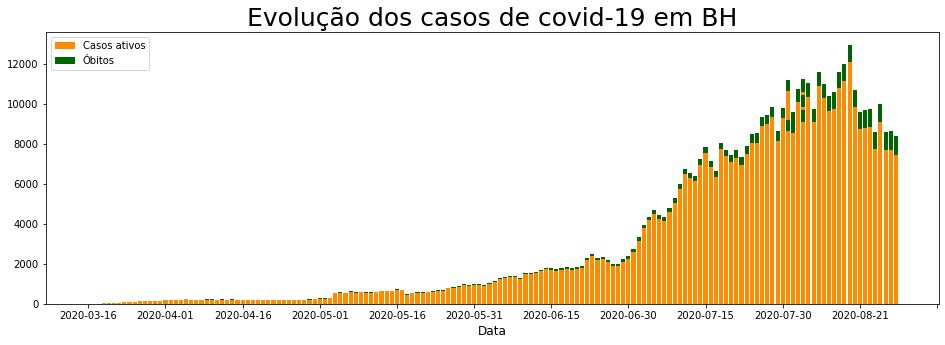

In [19]:
data = df_bh['last_available_date']
act_cases = df_bh['active_cases']
deaths = df_bh['deaths']    

fig, ax = plt.subplots(figsize=[16,5])

ax.bar(data, act_cases,label='Casos ativos',color='darkorange')
ax.bar(data, deaths, bottom=act_cases,label='Óbitos',color='darkgreen')

ax.set_xlabel('Data',fontsize=12)
ax.set_title("Evolução dos casos de covid-19 em BH", fontsize=25)
ax.legend()

plt.xticks(np.arange(0, len(data)+1, 15.0))
plt.show()


<p style='text-align: justify;'> Nesta primeira análise o objetivo foi apresentar a evolução dos casos de covid na cidade de Belo Horizonte, mostrando um panorama geral dos casos ativos e dos óbitos desde o início da pandemia. Para isso foram utilizados dados do arquivo csv "br_cities_cases_full.csv" disponibilizado no repositório da ImpulsoGov no GitHub (obtido do portal Brasil.IO). Num primeiro momento, foi realizada uma filtragem destes dados, obtendo um novo dataframe restrito a dados de BH, já que esse era o interesse principal. Logo após, foram coletadas as informações: "last_available_date" (data a qual o dado se refere), "deaths" (Número de mortes do último dia disponível igual ou anterior à data) e "active_cases" (Casos ativos estimados no dia). Isso possibilitou a plotagem de um gráfico de barras dos casos ativos e dos óbitos por dia, desde o primeiro caso de infecção. Essa visualização permite perceber que o número de mortes representa uma pequena parcela em relação ao número de casos ativos e a tendência mostrada é de diminuição desses números. 
OBS: como não é possível saber com certeza o dia que o dado do número de mortes se refere, foi assumido aqui que se refere à data em que foi reportado. Para uma análise mais assertiva seria necessário considerar a informação da data exata. </p>


### 2) Leitos de UTI disponibilizados para covid-19

In [20]:
url_bv = 'http://datasource.coronacidades.org/br/cities/cnes'
urlretrieve(url_bv,'datasets/beds_ventilators')

('datasets/beds_ventilators', <http.client.HTTPMessage at 0x7fc29411b400>)

In [22]:
df_bv = pd.read_csv('datasets/beds_ventilators')

In [40]:
df_bv_bh = df_bv[df_bv['city_name'] == 'Belo Horizonte']

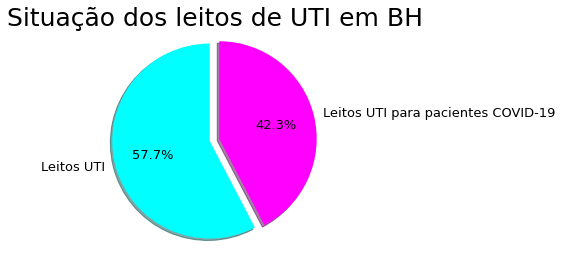

In [100]:
icu_beds = float(df_bv_bh['number_icu_beds']) - float(df_bv_bh['number_covid_icu_beds'])
icu_beds_covid = float(df_bv_bh['number_covid_icu_beds'])

label ='Leitos UTI','Leitos UTI para pacientes COVID-19'
sizes = [icu_beds_vazias,icu_beds_ocp]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=label, autopct='%1.1f%%',shadow=True, startangle=90,colors=['cyan', 'magenta'])
ax1.axis('equal') 
plt.title("Situação dos leitos de UTI em BH", fontsize=25)

plt.show()



<p style='text-align: justify;'> Nesta visualização o objetivo foi mostrar quantos leitos de UTI estão disponíveis em Belo Horizonte e quantos destes são destinados a pacientes infectados por covid-19. Para isso, utilizou-se os dados disponíveis no dataframe "br_cities_cnes.csv", também disponibilizado pela ImpulsoGov. Da mesma forma que na análise anterior, filtrou-se somente os dados de Belo Horizonte. As informações utilizadas aqui foram o número de leitos de UTI totais em BH (number_icu_beds) e o número de leitos de UTI para covid-19(number_covid_icu_beds). A escolha do gráfico de pizza foi interessante aqui para facilitar a visualização da proporção dos leitos de UTI disponibilizados para covid-19, que é quase a metade do total.
    
OBS: A ideia inicial era, na verdade, mostrar a taxa de ocupação dos leitos, mas pelos dados disponíveis neste dataframe não se pode afirmar que "number_covid_icu_beds" se refere aos leitos ocupados por pacientes de covid-19. </p>

### Ritmo de contágio

In [4]:
url_farol = 'http://datasource.coronacidades.org/br/cities/farolcovid/main'
urlretrieve(url_farol,'datasets/farol')

('datasets/farol', <http.client.HTTPMessage at 0x7f10c9694cf8>)

In [5]:
df_farol = pd.read_csv('datasets/farol')

In [6]:
df_farol_bh = df_farol[df_farol['city_name'] == 'Belo Horizonte']

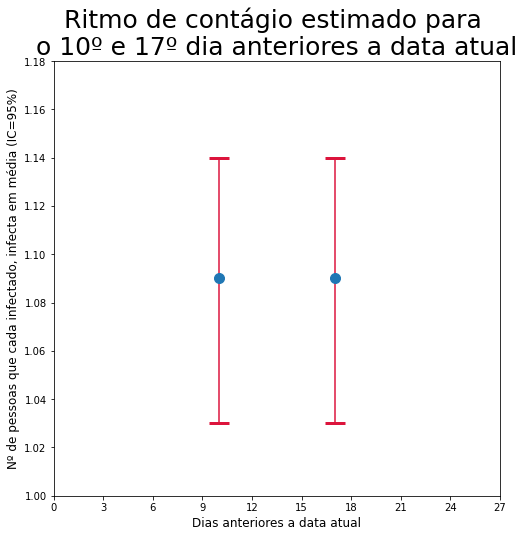

Classificação do ritmo de contágio: insatisfatório
Situação do ritmo de contágio: estabilizando


In [9]:
x = [10,17]
rt_ml = [float(df_farol_bh['rt_10days_ago_most_likely']),float(df_farol_bh['rt_17days_ago_most_likely'])]
rt_low = [float(df_farol_bh['rt_10days_ago_low']),float(df_farol_bh['rt_17days_ago_low'])]
rt_high = [float(df_farol_bh['rt_10days_ago_high']),float(df_farol_bh['rt_17days_ago_high'])]
ymin = [rt_ml[0] - rt_low[0],rt_ml[1] - rt_low[1]]
ymax = [rt_high[0] - rt_ml[0],rt_high[1] - rt_ml[1]]

ritmo_contag = str(df_farol_bh['rt_classification'])
ritmo_contag= ritmo_contag.split()

sit_contag = str(df_farol_bh['rt_growth'])
sit_contag = sit_contag.split()

yerror = [ymin,ymax]

plt.figure(figsize=[8,8])
plt.errorbar(x,rt_ml,yerr=yerror, fmt='o',marker='o',markersize=10,linestyle='none',capsize=10,capthick=3,ecolor='crimson')
plt.title("Ritmo de contágio estimado para \no 10º e 17º dia anteriores a data atual", fontsize=25)
plt.xlabel("Dias anteriores a data atual", fontsize=12)
plt.ylabel("Nº de pessoas que cada infectado, infecta em média (IC=95%)", fontsize=12)
plt.xticks(np.arange(0, 30, 3))
plt.yticks(np.arange(1, 1.20, 0.02))
plt.show()

print("Classificação do ritmo de contágio: {}\nSituação do ritmo de contágio: {}".format(ritmo_contag[1],sit_contag[1]))


<p style='text-align: justify;'> A ideia neste terceiro gráfico foi mostrar os indicadores do ritmo de contágio da covid-19 em BH. Os dados obtidos no dataframe "br_cities_farolcovid_main.csv" também foram filtrados para a cidade de Belo Horizonte. As informações usadas nesta análise foram do ritmo de contágio mais provável estimado para o 10º e 17º dia anterior a data, além dos intervalos de confiança superiores e inferiores para a estimação (IC-95%) referente aos mesmos dias. Uma vez que foram fornecidos intervalos de confiança, a visualização tipo "barra de erro" pareceu mais adequada. Além disso, foram impressas como anotação no gráfico, as informações de tendência de crescimento ('estabilizando', 'melhorando', nan, 'piorando') e classificação quanto ao ritmo de contágio estimado ('bom', 'insatisfatório', nan, 'ruim'), facilitando ao leitor a interpretação dos dados. Foi possível observar aqui, que cada paciente infectado, infecta em torno de 1 pessoa, e que apesar do ritmo de contágio ainda estar insatisfatório, sua tendência é estabilizar. </p>

### Casos reportados como Síndrome Respiratória Aguda Grave por região de BH

In [63]:
df_srag_BH = pd.read_csv("datasets/casos_BH.csv")

In [64]:
df_reg_BH = pd.read_csv("datasets/regioes.csv")

In [65]:
mix = pd.merge(df_srag_BH,df_reg_BH)

In [67]:
por_regiao = mix.groupby('Administração').sum()

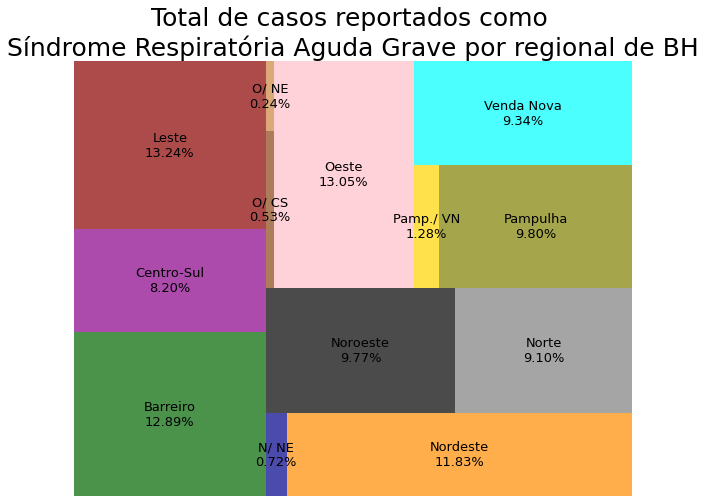

Legenda:
O/NE = Oeste/Noroeste 
O/CS = Oeste/Centro-Sul
Pamp./VN = Pampulha/Venda-Nova
N/NE = Norte/Noroeste


In [69]:
tot2 = por_regiao["Total"]
zonas2 = por_regiao.index
tot_porc2 = []
new_tot2 = []

for i in tot2: 
    porc2 = i/por_regiao['Total'].sum()*100 
    porc2 = "{:.2f}".format(porc2)
    tot_porc2.append(porc2)
    
    
for j in tot_porc2:
    num2 = str(j)
    new_tot2.append(num2)   

labels2 = zonas2+"\n"+new_tot2+"%"


plt.figure(figsize=[10,8])
plt.title("Total de casos reportados como \nSíndrome Respiratória Aguda Grave por regional de BH", fontsize=25)
plt.rc('font', size=13)
squarify.plot(sizes=tot2, label=labels2, alpha=0.7, color = ['darkgreen', 'darkmagenta', 'darkred', 'darkblue', 'darkorange','black','gray','saddlebrown','peru', 'pink', 'gold', 'olive','cyan','darkviolet'])

plt.axis('off')

plt.show()

print("Legenda:\nO/NE = Oeste/Noroeste \nO/CS = Oeste/Centro-Sul\nPamp./VN = Pampulha/Venda-Nova\nN/NE = Norte/Noroeste")
   

<p style='text-align: justify;'> Esta visualização tinha o objetivo de mostrar o número de casos reportados por região da cidade de Belo Horizonte, e por isso os dados foram coletados de fontes extras. 
O primeiro dataframe foi obtido do boletim epidemiológico e assistencial, publicado pela prefeitura de Belo Horizonte no dia 27/08/2020 (https://prefeitura.pbh.gov.br/sites/default/files/estrutura-de-governo/saude/2020/boletim_epidemiologico_assistencial_92_covid-19_27-08-2020.pdf). Neste documento há uma tabela que mostra os casos: acumulados, confirmados de SG(Síndrome Gripal), SRAG(Síndrome Respiratória Aguda Grave) e óbitos por COVID-19 segundo bairro de residência até 21/8/2020. Estes dados foram copiados e salvos no formato csv para utilização neste trabalho. 
Além disso, foi utilizada a lista de bairros de Belo Horizonte, disponível em (https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Belo_Horizonte), que relaciona os bairros de Belo Horizonte com suas respectivas administrações regionais e zonas. 
Desta forma, um primeiro passo foi unir o dataframe contendo o número de casos reportados com aquele contendo a lista de bairros por regionais. Assim, pode-se obter a soma dos casos em cada administração regional. Em seguida, foi selecionada somente a soma dos casos reportados como SRAG, que tiveram sua porcentagem calculada por regional. E finalmente foram plotados estes dados na forma de treemap, em que os quadrantes de maior tamanho representam um maior número de casos reportados. Foi possível perceber com essa visualização uma certa homogeneidade na distribuição dos casos de SRAG em BH. 

OBS: A primeira ideia era promover uma visualização geoespacial dos casos de covid-19 por bairro de BH. Mas não foi possível encontrar disponíveis arquivos geoespaciais, como shapefiles ou JSON dos bairros de BH, por isso a análise ficou restrita a visualização gráfica. Além disso, a prefeitura disponibiliza os dados como casos de SRAG, e a informação sobre dados de covid-19 também ficou prejudicada. </p>

### Prioridade de abertura dos setores da economia

In [70]:
url_sr = 'http://datasource.coronacidades.org/br/states/safereopen/main'
urlretrieve(url_sr,'datasets/safety_reopening')

('datasets/safety_reopening', <http.client.HTTPMessage at 0x7fc293349668>)

In [71]:
df_sr = pd.read_csv('datasets/safety_reopening')

In [81]:
df_sr_mg = df_sr[df_sr['state_num_id'] == 31]

In [82]:
df_medias = df_sr.groupby('sector').mean()

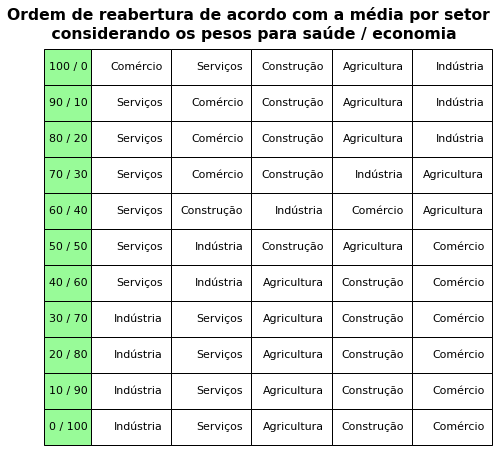

In [86]:
df_ordenado00 = df_medias.sort_values(by='cd_id_00')
risco_00 = df_ordenado00['cd_id_00']

df_ordenado01 = df_medias.sort_values(by='cd_id_01')
risco_01 = df_ordenado01['cd_id_01']

df_ordenado02 = df_medias.sort_values(by='cd_id_02')
risco_02 = df_ordenado02['cd_id_02']

df_ordenado03 = df_medias.sort_values(by='cd_id_03')
risco_03 = df_ordenado03['cd_id_03']

df_ordenado04 = df_medias.sort_values(by='cd_id_04')
risco_04 = df_ordenado04['cd_id_04']

df_ordenado05 = df_medias.sort_values(by='cd_id_05')
risco_05 = df_ordenado05['cd_id_05']

df_ordenado06 = df_medias.sort_values(by='cd_id_06')
risco_06 = df_ordenado06['cd_id_06']

df_ordenado07 = df_medias.sort_values(by='cd_id_07')
risco_07 = df_ordenado07['cd_id_07']

df_ordenado08 = df_medias.sort_values(by='cd_id_08')
risco_08 = df_ordenado08['cd_id_08']

df_ordenado09 = df_medias.sort_values(by='cd_id_09')
risco_09 = df_ordenado09['cd_id_09']

df_ordenado10 = df_medias.sort_values(by='cd_id_10')
risco_10 = df_ordenado10['cd_id_10']

texto = [risco_10.index, risco_09.index, risco_08.index, risco_07.index, risco_06.index, risco_05.index, risco_04.index, risco_03.index, risco_02.index, risco_01.index, risco_00.index]
linhas = ['100 / 0', '90 / 10', '80 / 20', '70 / 30', '60 / 40', '50 / 50', '40 / 60', '30 / 70', '20 / 80', '10 / 90', '0 / 100']
colunas = ['Peso para saude','Peso para economia']

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table(cellText = texto, rowLabels=linhas, rowColours =["palegreen"] * 11,  loc = 'upper left')         
  
ax.set_title('Ordem de reabertura de acordo com a média por setor \n considerando os pesos para saúde / economia',fontweight ="bold") 

table.scale(1.2, 3.0)

plt.show() 

<p style='text-align: justify;'> A última visualização consistiu em mostrar a ordem prevista de reabertura dos setores da economia considerando diferentes pesos para saúde e economia. Os dados foram obtidos do arquivo "br_states_safereopen_main.csv", disponível também no repositório da ImpulsoGov. Desta vez foi necessário filtrar por código do estado, pois os dados estavam classificados a nível de estado. Em seguida, os dados foram agrupados por setor da economia e calculada a média por setor do índice de ordenamento setorial considerando os pesos xx para saúde e (1 - xx) para economia. Os dados foram ordenados e apresentados em forma de tabela para uma melhor visualização dos efeitos de cada peso. Uma conclusão geral é que ao priorizar a saúde, o setor de comércio tem prioridade de reabertura, enquanto que priorizando a economia, a indústria deve ser o primeiro na retomada de atividades. </p>